In [2]:
import warnings

#%pip install jsonlines
#%pip install seaborn
warnings.filterwarnings("ignore")

In [3]:
import jsonlines                        # used to turn the huge glob of data from lab.js into a pandas dataframe
import pandas as pd                     # used to organize the data in columns and rows
import seaborn as sns                   # used to make pretty pictures :-)
from matplotlib import pyplot as plt    # used to touch up the figures that `seaborn`` makes

In [4]:
raw = '/Users/ethan/Documents/GitHub/ExPsyLing/Experiments/Experiment 2/Experiment2_rawdata_2024.txt'

###########################################################################

# I copied this section from here: https://forum.cogsci.nl/discussion/8257/problem-with-jatos-result-conversion
# I think I would write it slightly differently, but hey, it works, and I didn't know how to do this before I found this post, so I'm not complaining

i = 0                                                          # set counter variable "i" to zero

with jsonlines.open(raw) as reader:                            # make a "reader" variable with the lab.js data (which is stored in "JSON" format)
    for line in reader:                                        # loop through every line in the lab.js JSON data
        if i == 0:                                             # check if i equals zero. If it does, then
            df = pd.DataFrame(line)                             # make a new pandas dataframe called "df" 
            i += 1                                              # add 1 to i
        else:                                                  # if i does not equal zero 
            df = pd.concat([df, pd.DataFrame(line)])           # get the next line of the json file, convert it to a dataframe, and stick it on the bottom of "df" 
            i += 1                                            # I don't think you actually  need this line. If it is running, then i already does not equal zero, so what's the point?

df['url'] = df['url'].ffill()                                   # fill in the column with the participant ID numbers
df['url'] = [int(x['srid']) for x in list(df['url'])]           # get the ID numbers out of the "dictionaries" and re-write the url column with the extracted ID numbers
df.rename(columns={'url': 'ID'}, inplace=True)                  # rename the url column as "ID"
del df['meta']                                                  # delete the "meta" column. I put this here just to show you how to delete a column

In [5]:
# Make a new dataframe with only rows where the "sender" column is "Trial" and the "Block" column is not "practice"
df = df[(df['sender'] == 'Stimulus') & (df['block'] != 'practice')]


In [9]:
# Make a new dataframe with only the columns that we want to keep
df = df[['ID', 'duration', 'correct', 'stim', 'condition']]
df.head(5)

,ID,duration,correct,stim,condition
34,4665,649.8,False,limp-tiger,Unrelated
38,4665,669.2,True,plang-fluwer,Nonword
42,4665,529.6,True,tall-short,Related
46,4665,553.7,True,nock-kry,Nonword
50,4665,561.1,True,yot-colp,Nonword


In [17]:
df.head()

,ID,duration,correct,stim,condition
34,4665,649.8,False,limp-tiger,Unrelated
38,4665,669.2,True,plang-fluwer,Nonword
42,4665,529.6,True,tall-short,Related
46,4665,553.7,True,nock-kry,Nonword
50,4665,561.1,True,yot-colp,Nonword


In [18]:
# Make a new dataframe d with only the rows where the "correct" column is "True"
d = df[df['correct'] == True]
d.head()

,ID,duration,correct,stim,condition
38,4665,669.2,True,plang-fluwer,Nonword
42,4665,529.6,True,tall-short,Related
46,4665,553.7,True,nock-kry,Nonword
50,4665,561.1,True,yot-colp,Nonword
54,4665,582.2,True,luck-key,Unrelated


<Axes: xlabel='condition', ylabel='duration'>

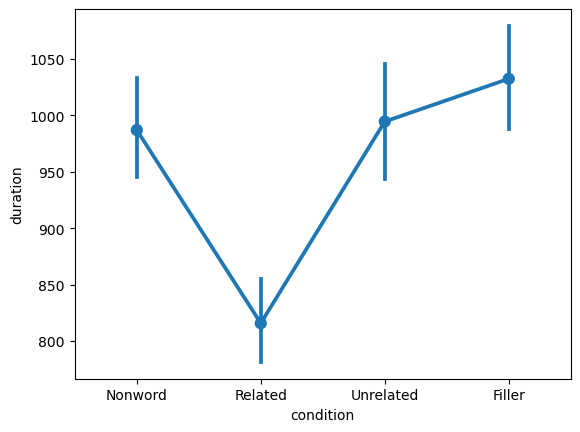

In [21]:
# Plot condition vs duration
sns.pointplot(x='condition', y='duration', data=d)